In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

2023-03-01 13:30:22.338056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 13:30:22.752000: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-01 13:30:22.819943: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-01 13:30:22.819963: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Task 0. Normalization Constants
def normalization_constants(X):
    """
    Calculates the normalization constants of a matrix
    X: numpy.ndarray of shape (m, nx)
    m: number of data points
    nx: number of features
    Returns: mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    stdev = np.std(X, axis=0)
    return (mean, stdev)

In [3]:
# 0-main
np.random.seed(0)
a = np.random.normal(0, 2, size=(100, 1))
b = np.random.normal(2, 1, size=(100, 1))
c = np.random.normal(-3, 10, size=(100, 1))
X = np.concatenate((a, b, c), axis=1)
m, s = normalization_constants(X)
print(m)
print(s)

[ 0.11961603  2.08201297 -3.59232261]
[2.01576449 1.034667   9.52002619]


In [4]:
# Task 1. Normalize
def normalize(X, m, s):
    """
    Normalizes a matrix
    X: numpy.ndarray matrix of shape (d, nx)
    d: number of data points(called m in task above)
    nx: number of features
    m: mean of all features(calculated in task 0)
    s: standard deviation of each feature (calculated in task 0)
    Returns: Normalized X matirx
    """
    return ((X - m) / s)

In [5]:
# 1-main
np.random.seed(0)
a = np.random.normal(0, 2, size=(100, 1))
b = np.random.normal(2, 1, size=(100, 1))
c = np.random.normal(-3, 10, size=(100, 1))
X = np.concatenate((a, b, c), axis=1)
m, s = normalization_constants(X)
print(X[:10])
X = normalize(X, m, s)
print(X[:10])
m, s = normalization_constants(X)
print(m)
print(s)

[[  3.52810469   3.8831507   -6.69181838]
 [  0.80031442   0.65224094  -5.39379178]
 [  1.95747597   0.729515     7.99659596]
 [  4.4817864    2.96939671   3.55263731]
 [  3.73511598   0.82687659   3.40131526]
 [ -1.95455576   3.94362119 -19.16956044]
 [  1.90017684   1.58638102  -3.24326124]
 [ -0.30271442   1.25254519 -10.38030909]
 [ -0.2064377    3.92294203  -0.20075401]
 [  0.821197     3.48051479  -3.9815039 ]]
[[ 1.69091612  1.74078977 -0.32557639]
 [ 0.33768746 -1.38186686 -0.18922943]
 [ 0.91174338 -1.3071819   1.21732003]
 [ 2.16402779  0.85765153  0.75051893]
 [ 1.79361228 -1.21308245  0.73462381]
 [-1.02897526  1.79923417 -1.63625998]
 [ 0.88331787 -0.47902557  0.03666601]
 [-0.20951378 -0.80167608 -0.71302183]
 [-0.1617519   1.77924787  0.35625623]
 [ 0.34804709  1.35164437 -0.04088028]]
[ 2.44249065e-17 -4.99600361e-16  1.46549439e-16]
[1. 1. 1.]


In [6]:
# Task 2. Shuffle Data
def shuffle_data(X, Y):
    """
    Shuffles the data points in two matrices the same way
    X: First numpy.ndarray matrix of shape (m, nx) to be shuffled
    Y: Second numpy.ndarray matrix of shape (m, ny) to be shuffled
    m: number of data points
    nx/ny: number of features in X and Y respectively
    """
    assert len(X) == len(Y)
    p = np.random.permutation(len(X))
    return X[p], Y[p]

In [7]:
# 2-main
X = np.array([[1, 2],
              [3, 4],
              [5, 6],
              [7, 8], 
              [9, 10]])
Y = np.array([[11, 12],
              [13, 14],
              [15, 16],
              [17, 18],
              [19, 20]])

np.random.seed(0)
X_shuffled, Y_shuffled = shuffle_data(X, Y)

print(X_shuffled)
print(Y_shuffled)

[[ 5  6]
 [ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]]
[[15 16]
 [11 12]
 [13 14]
 [17 18]
 [19 20]]


In [8]:
# Task 3. Mini-Batch
def train_mini_batch(X_train, 
                     Y_train, 
                     X_valid, 
                     Y_valid, 
                     batch_size=32, 
                     epochs=5, 
                     load_path="/tmp/model.ckpt", 
                     save_path="/tmp/model.ckpt"):
    """
    Trains a loaded neural network model using mini-batch gradient descent
    X_train: numpy.ndarray shape (m, 784) containing training data
        m: numper of data points (i.e. number of images)
        784: numper of data features (i.e. pixels per image)
    Y-train: one-hot numpy.ndarray shape (m, 10) containing training labels
        10: number of classes the model should classify
    X_valid: numpy.ndarray containing validation data
    Y_valid: one-hot numpy.ndarray containing validation labels
    batch_size: number of data points in a batch
    epochs: number of times training should pass through the whole dataset
    load_path: path from where the model should be loaded
    save_path: path to where the model should be saved after training
    Returns: path where the model was saved
    """
    with tf.Session() as sess:
        prev_batch = tf.train.import_meta_graph(load_path + '.meta')
        prev_batch.restore(sess, load_path)
        x = tf.get_collection('x')[0]
        y = tf.get_collection('y')[0]
        accuracy = tf.get_collection('accuracy')[0]
        loss = tf.get_collection('loss')[0]
        train_op = tf.get_collection('train_op')
        # divide the X_train matrix into equal number of mini-batches that 
        # each contain batch_size number of data points
        mini_batch_size = len(X_train)//batch_size
        # if guard for if last mini batch is smaller than batch size
        # python division is tricky sometimes, might get final batch size = 31
        while mini_batch_size % batch_size != 0:
            mini_batch_size += 1

        for i in range(epochs + 1):
            train_cost, train_accuracy = sess.run((loss, accuracy), 
                                                  feed_dict={x: X_train,
                                                             y: Y_train})
            val_cost, val_accuracy = sess.run((loss, accuracy), 
                                              feed_dict={x: X_valid, 
                                                         y: Y_valid})
            print("After {} epochs:".format(i))
            print("\tTraining Cost: {}".format(train_cost))
            print("\tTraining Accuracy: {}".format(train_accuracy))
            print("\tValidation Cost: {}".format(val_cost))
            print("\tValidation Accuracy: {}".format(val_accuracy))
            if i < epochs:
                # Shuffle data to use different set in each epoch
                X_Shuffled, Y_Shuffled = shuffle_data(X_train, Y_train)
                for batch in range(mini_batch_size):
                    mini_batch_dict = {x: X_Shuffled[batch_size *
                                                     batch:batch_size *
                                                     (batch + 1)],
                                       y: Y_Shuffled[batch_size *
                                                     batch:batch_size *
                                                     (batch + 1)]}
                    sess.run((train_op), feed_dict = mini_batch_dict)
                    if (batch + 1) % 100 == 0 and batch != 0:
                        mini_batch_cost = loss.eval(mini_batch_dict)
                        mini_batch_accuracy = accuracy.eval(mini_batch_dict)
                        print("\tStep {}:".format(batch + 1))
                        print("\t\tCost: {}".format(mini_batch_cost))
                        print("\t\tAccuracy: {}".format(mini_batch_accuracy))
        saver = tf.train.Saver()
        return saver.save(sess, save_path)

In [9]:
# 3-main
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    oh = np.zeros((Y.shape[0], classes))
    oh[np.arange(Y.shape[0]), Y] = 1
    return oh

lib= np.load('../data/MNIST.npz')
X_train_3D = lib['X_train']
Y_train = lib['Y_train']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1))
Y_train_oh = one_hot(Y_train, 10)
X_valid_3D = lib['X_valid']
Y_valid = lib['Y_valid']
X_valid = X_valid_3D.reshape((X_valid_3D.shape[0], -1))
Y_valid_oh = one_hot(Y_valid, 10)

layer_sizes = [256, 256, 10]
activations = [tf.nn.tanh, tf.nn.tanh, None]
alpha = 0.01
iterations = 5000

np.random.seed(0)
save_path = train_mini_batch(X_train, Y_train_oh, X_valid, Y_valid_oh,
                                epochs=10, load_path='./graph.ckpt',
                                save_path='./model.ckpt')
print('Model saved in path: {}'.format(save_path))

INFO:tensorflow:Restoring parameters from ./graph.ckpt


2023-03-01 09:40:24.548308: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-01 09:40:24.548351: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-01 09:40:24.548368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BensLaptop): /proc/driver/nvidia/version does not exist
2023-03-01 09:40:24.548703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 09:40:24.618684: I tensorflow/compiler/mli

1562
1562
1563
1564
1565
1566
1567
After 0 epochs:
	Training Cost: 2.8232288360595703
	Training Accuracy: 0.08726000040769577
	Validation Cost: 2.810532331466675
	Validation Accuracy: 0.08640000224113464
	Step 100:
		Cost: 0.9012309312820435
		Accuracy: 0.6875
	Step 200:
		Cost: 0.632826566696167
		Accuracy: 0.8125
	Step 300:
		Cost: 0.698043167591095
		Accuracy: 0.8125
	Step 400:
		Cost: 0.30890679359436035
		Accuracy: 0.96875
	Step 500:
		Cost: 0.30931922793388367
		Accuracy: 0.9375
	Step 600:
		Cost: 0.30502936244010925
		Accuracy: 0.9375
	Step 700:
		Cost: 0.5535626411437988
		Accuracy: 0.84375
	Step 800:
		Cost: 0.3425140976905823
		Accuracy: 0.84375
	Step 900:
		Cost: 0.35854318737983704
		Accuracy: 0.875
	Step 1000:
		Cost: 0.3670477867126465
		Accuracy: 0.8125
	Step 1100:
		Cost: 0.18670576810836792
		Accuracy: 0.9375
	Step 1200:
		Cost: 0.18414628505706787
		Accuracy: 0.96875
	Step 1300:
		Cost: 0.7523375749588013
		Accuracy: 0.84375
	Step 1400:
		Cost: 0.3148524761199951
		Ac

In [10]:
# Task 4. Moving Average
def moving_average(data, beta):
    """
    Calculates the bias corrected weighted moving average of a data set
    data: list of data to calculate the moving average of
    beta: weight used for the moving average
    Returns a list containing the moving averages of data
    """
    weighted_average = 0
    weighted_average_list = []
    for count in range(len(data)):
        weighted_average = (weighted_average * beta) + ((1 - beta) * data[count])
        bias_correction = weighted_average / (1 - (beta ** (count + 1)))
        weighted_average_list.append(bias_correction)
    return weighted_average_list

[72.0, 75.15789473684211, 73.62361623616238, 71.98836871183484, 70.52604332006544, 70.20035470453027, 71.88706986789997, 73.13597603396988, 71.80782582850702, 70.60905915023126, 69.93737009120935, 71.0609712312634, 70.11422355031073, 69.32143707981284, 70.79208718739721, 70.81760741911772, 70.59946700377961, 69.9406328280786, 70.17873340222755, 69.47534437750306, 68.41139351151023, 67.58929643210207, 66.97601174673004, 66.86995043877324, 67.42263231561797, 67.91198666959514, 67.8151574064495, 67.72913996327617, 67.65262186609462, 67.68889744321645, 68.44900744806469]


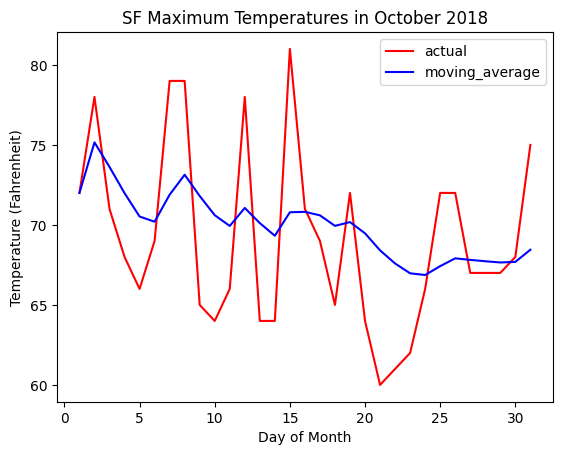

In [11]:
# 4-main
data = [72, 78, 71, 68, 66, 69, 79, 79, 65, 64, 66, 78, 64, 64, 81, 71, 69,
                65, 72, 64, 60, 61, 62, 66, 72, 72, 67, 67, 67, 68, 75]
days = list(range(1, len(data) + 1))
m_avg = moving_average(data, 0.9)
print(m_avg)
plt.plot(days, data, 'r', days, m_avg, 'b')
plt.xlabel('Day of Month')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('SF Maximum Temperatures in October 2018')
plt.legend(['actual', 'moving_average'])
plt.show()

In [12]:
# Task 5. Momentum
def update_variables_momentum(alpha, beta1, var, grad, v):
    """
    Updates a variable using gradient descent with momentum optimization
    alpha: learning rate
    beta1: momentum weight
    var: numpy.ndarray containing the variable to be updated(i.e. W or b)
    grad: numpy.ndarray containing the gradient of var(i.e. dW or db)
    v: previous first moment of var(dW_prev or db_prev)
    Returns the updated variable and the new moment
        new_var will be passed as var in next iteration
        new_moment will be passed as v in next iteration
    """
    new_moment = beta1 * v + (grad * (1 - beta1))
    new_var = var - (alpha * new_moment)

    return new_var, new_moment

Cost after 0 iterations: 4.365105010037203
Cost after 100 iterations: 0.5729736703124043
Cost after 200 iterations: 0.24493574051131106
Cost after 300 iterations: 0.1771132508758216
Cost after 400 iterations: 0.14286111618067304
Cost after 500 iterations: 0.12051674907075897
Cost after 600 iterations: 0.10450664363662195
Cost after 700 iterations: 0.09245615061035156
Cost after 800 iterations: 0.08308760082979069
Cost after 900 iterations: 0.07562924162824029
Cost after 1000 iterations: 0.0695782354732263


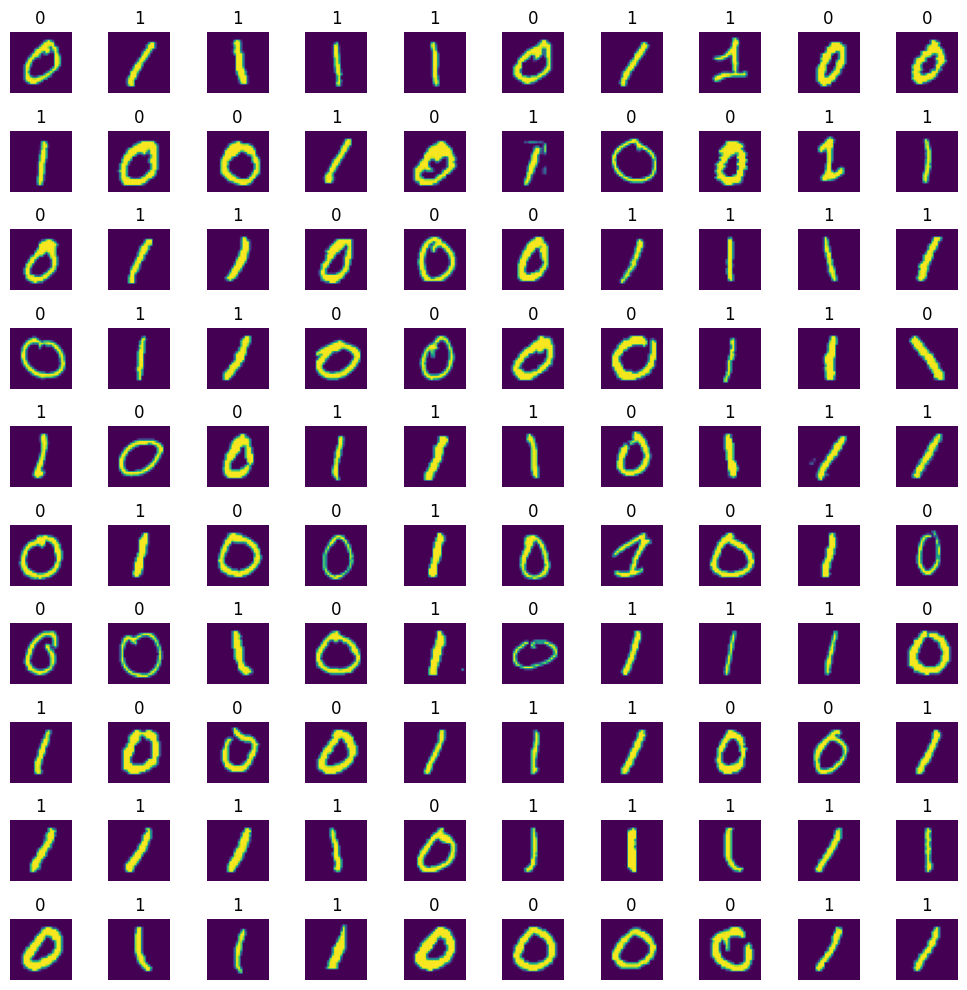

In [13]:
# 5-main
def forward_prop(X, W, b):
    Z = np.matmul(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def calculate_grads(Y, A, W, b):
    m = Y.shape[0]
    dZ = A - Y
    dW = np.matmul(X.T, dZ) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    return dW, db

def calculate_cost(Y, A):
    m = Y.shape[0]
    loss = - (Y * np.log(A) + (1 - Y) * np.log(1 - A))
    cost = np.sum(loss) / m

    return cost


lib_train = np.load('../data/Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y'].T
X = X_3D.reshape((X_3D.shape[0], -1))

nx = X.shape[1]
np.random.seed(0)
W = np.random.randn(nx, 1)
b = 0
dW_prev = np.zeros((nx, 1))
db_prev = 0
for i in range(1000):
    A = forward_prop(X, W, b)
    if not (i % 100):
        cost = calculate_cost(Y, A)
        print('Cost after {} iterations: {}'.format(i, cost))
    dW, db = calculate_grads(Y, A, W, b)
    W, dW_prev = update_variables_momentum(0.01, 0.9, W, dW, dW_prev)
    b, db_prev = update_variables_momentum(0.01, 0.9, b, db, db_prev)
A = forward_prop(X, W, b)
cost = calculate_cost(Y, A)
print('Cost after {} iterations: {}'.format(1000, cost))

Y_pred = np.where(A >= 0.5, 1, 0)
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_3D[i])
    plt.title(str(Y_pred[i, 0]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
# Task 6. Momentum Upgraded
def create_momentum_op(loss, alpha, beta1):
    """
    Creates the training operation for a neural network in tensorflow
    using the gradient descent with momentum optimization algorithm
    loss: loss of the network
    alpha: learning rate
    beta1: momentum weight
    Returns the momentum optimization operation
    """
    return tf.train.MomentumOptimizer(alpha, beta1).minimize(loss)

INFO:tensorflow:Restoring parameters from ./graph.ckpt


2023-03-01 09:43:18.000932: W tensorflow/c/c_api.cc:291] Operation '{name:'layer_2/bias/Assign' id:47 op device:{requested: '', assigned: ''} def:{{{node layer_2/bias/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@layer_2/bias"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](layer_2/bias, layer_2/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Cost after 0 iterations: 2.8232288360595703
Cost after 100 iterations: 0.29714080691337585
Cost after 200 iterations: 0.24160431325435638
Cost after 300 iterations: 0.20696929097175598
Cost after 400 iterations: 0.18103431165218353
Cost after 500 iterations: 0.16049277782440186
Cost after 600 iterations: 0.14379896223545074
Cost after 700 iterations: 0.13001582026481628
Cost after 800 iterations: 0.1184675320982933
Cost after 900 iterations: 0.10864464938640594
Cost after 1000 iterations: 0.10017786175012589


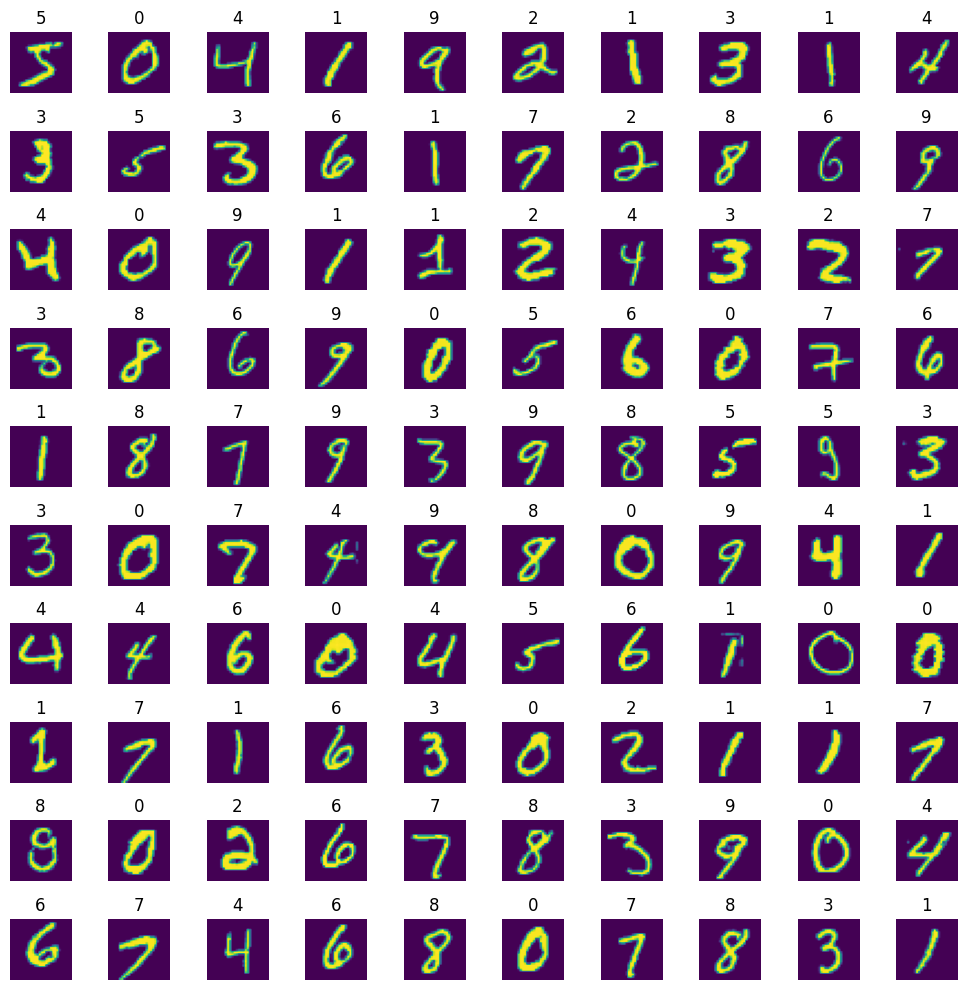

In [15]:
# 6-main
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot

lib= np.load('../data/MNIST.npz')
X_3D = lib['X_train']
Y = lib['Y_train']
X = X_3D.reshape((X_3D.shape[0], -1))
Y_oh = one_hot(Y, 10)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./graph.ckpt.meta')
    saver.restore(sess, './graph.ckpt')
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    y_pred = tf.get_collection('y_pred')[0]
    loss = tf.get_collection('loss')[0]
    train_op = create_momentum_op(loss, 0.01, 0.9)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(1000):
        if not (i % 100):
            cost = sess.run(loss, feed_dict={x:X, y:Y_oh})
            print('Cost after {} iterations: {}'.format(i, cost))
        sess.run(train_op, feed_dict={x:X, y:Y_oh})
    cost, Y_pred_oh = sess.run((loss, y_pred), feed_dict={x:X, y:Y_oh})
    print('Cost after {} iterations: {}'.format(1000, cost))

Y_pred = np.argmax(Y_pred_oh, axis=1)

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_3D[i])
    plt.title(str(Y_pred[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
# Task 7. RMSProp
def update_variables_RMSProp(alpha, beta2, epsilon, var, grad, s):
    """
    Function that updates a variable using the RMSProp algorithm
        Root Mean Square Propagation
    alpha: learning rate
    beta2: RMSProp weight
    epsilon: small number to avoid divide by zero error
    var: numpy.ndarray containing the variable to be updated(i.e. W or b)
    grad: numpy.ndarray containing the gradient of var(i.e. dW or db)
    s: previous second moment of var
    Returns the updated variable and new moment, respectively
        new_var will be passed as var in the next iteration
        new_moment will be passed as s in the next iteration
    """
    new_moment = beta2 * s + ((1 - beta2) * (grad ** 2))
    new_var = var - (alpha * (grad/((new_moment ** (1/2)) + epsilon)))

    return new_var, new_moment

Cost after 0 iterations: 4.365105010037203
Cost after 100 iterations: 1.370832184880606
Cost after 200 iterations: 0.2269339299030878
Cost after 300 iterations: 0.05133394800221909
Cost after 400 iterations: 0.018365571163723598
Cost after 500 iterations: 0.008176390663315379
Cost after 600 iterations: 0.0040913488758203935
Cost after 700 iterations: 0.002195647004375403
Cost after 800 iterations: 0.001148167690302137
Cost after 900 iterations: 0.0005599359680776992
Cost after 1000 iterations: 0.00026558391294521997


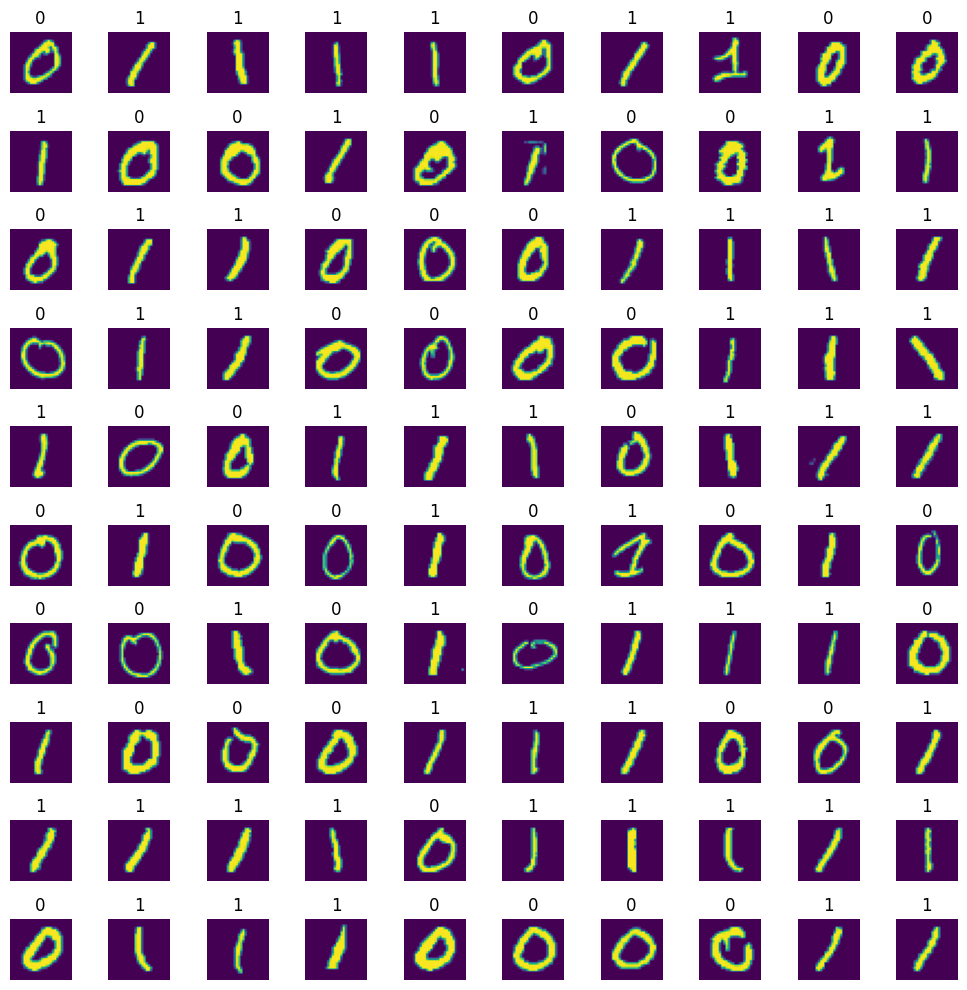

In [17]:
# 7-main
def forward_prop(X, W, b):
    Z = np.matmul(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def calculate_grads(Y, A, W, b):
    m = Y.shape[0]
    dZ = A - Y
    dW = np.matmul(X.T, dZ) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    return dW, db

def calculate_cost(Y, A):
    m = Y.shape[0]
    loss = - (Y * np.log(A) + (1 - Y) * np.log(1 - A))
    cost = np.sum(loss) / m

    return cost

lib_train = np.load('../data/Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y'].T
X = X_3D.reshape((X_3D.shape[0], -1))

nx = X.shape[1]
np.random.seed(0)
W = np.random.randn(nx, 1)
b = 0
dW_prev = np.zeros((nx, 1))
db_prev = 0
for i in range(1000):
    A = forward_prop(X, W, b)
    if not (i % 100):
        cost = calculate_cost(Y, A)
        print('Cost after {} iterations: {}'.format(i, cost))
    dW, db = calculate_grads(Y, A, W, b)
    W, dW_prev = update_variables_RMSProp(0.001, 0.9, 1e-8, W, dW, dW_prev)
    b, db_prev = update_variables_RMSProp(0.001, 0.9, 1e-8, b, db, db_prev)
A = forward_prop(X, W, b)
cost = calculate_cost(Y, A)
print('Cost after {} iterations: {}'.format(1000, cost))

Y_pred = np.where(A >= 0.5, 1, 0)
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_3D[i])
    plt.title(str(Y_pred[i, 0]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
# Task 8. RMSProp Upgraded
def create_RMSProp_op(loss, alpha, beta2, epsilon):
    """
    Implementation of RMSProp algo using tensorflow
    loss: Loss of the network
    alpha: Learning rate
    beta2: RMSProp weight
    epsilon: Small number to avoid divide by zero error
    Returns the RMSProp optimization operation
    """
    return tf.train.RMSPropOptimizer(learning_rate=alpha, decay=beta2, epsilon=epsilon).minimize(loss)

INFO:tensorflow:Restoring parameters from ./graph.ckpt
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2023-03-01 09:50:31.667346: W tensorflow/c/c_api.cc:291] Operation '{name:'layer_2/bias/Momentum/Assign' id:623 op device:{requested: '', assigned: ''} def:{{{node layer_2/bias/Momentum/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@layer_2/bias"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](layer_2/bias/Momentum, layer_2/bias/Momentum/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Cost after 0 iterations: 2.8232288360595703
Cost after 100 iterations: 0.3497934341430664
Cost after 200 iterations: 0.09719152003526688
Cost after 300 iterations: 0.0601765513420105
Cost after 400 iterations: 0.007705423049628735
Cost after 500 iterations: 0.0022695083171129227
Cost after 600 iterations: 0.0008408412104472518
Cost after 700 iterations: 0.00048476288793608546
Cost after 800 iterations: 0.000335428339894861
Cost after 900 iterations: 0.0002543598529882729
Cost after 1000 iterations: 0.00020382122602313757


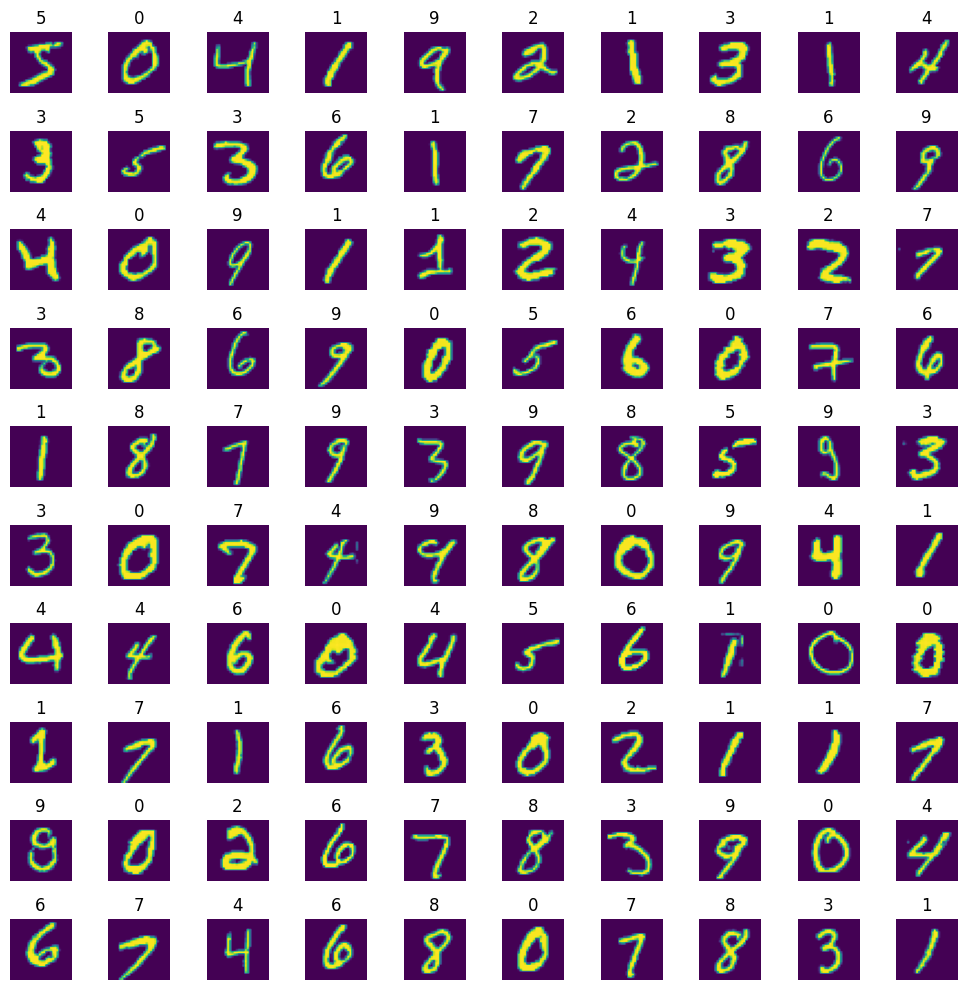

In [19]:
# 8-main
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot


lib= np.load('../data/MNIST.npz')
X_3D = lib['X_train']
Y = lib['Y_train']
X = X_3D.reshape((X_3D.shape[0], -1))
Y_oh = one_hot(Y, 10)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./graph.ckpt.meta')
    saver.restore(sess, './graph.ckpt')
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    y_pred = tf.get_collection('y_pred')[0]
    loss = tf.get_collection('loss')[0]
    train_op = create_RMSProp_op(loss, 0.001, 0.9, 1e-8)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(1000):
        if not (i % 100):
            cost = sess.run(loss, feed_dict={x:X, y:Y_oh})
            print('Cost after {} iterations: {}'.format(i, cost))
        sess.run(train_op, feed_dict={x:X, y:Y_oh})
    cost, Y_pred_oh = sess.run((loss, y_pred), feed_dict={x:X, y:Y_oh})
    print('Cost after {} iterations: {}'.format(1000, cost))

Y_pred = np.argmax(Y_pred_oh, axis=1)

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_3D[i])
    plt.title(str(Y_pred[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# Task 9. Adam
def update_variables_Adam(alpha, beta1, beta2, epsilon, var, grad, v, s, t):
    """
    Implementation of Adam optimization algorithm
    alpha: learning rate
    beta1: weight used for the first moment
    beta2: weight used for the second moment
    epsilon: small number to avoid divide by zero error
    var: numpy.ndarray containing the variable to be updated
    grad: numpy.ndarray containing the gradient of var
    v: previous first moment of var
    s: previous second moment of var
    t: time step used for bias correction
    Returns the updated variable, new first moment and new second moment
        new first moment = Vd
        new second moment = Sd
        updated variable = new_var
    """
    Vd = 0
    Sd = 0

    Vd = beta1 * v + ((1 - beta1) * grad)
    Sd = beta2 * s + ((1 - beta2) * (grad ** 2))
    Vd_correct = Vd / (1 - beta1 ** t)
    Sd_correct = Sd / (1 - beta2 ** t)
    new_var = var - (alpha * (Vd_correct / ((Sd_correct ** (1/2)) + epsilon)))

    return new_var, Vd, Sd

Cost after 0 iterations: 4.365105010037203
Cost after 100 iterations: 1.5950468370180395
Cost after 200 iterations: 0.39027618485645293
Cost after 300 iterations: 0.13737908627614337
Cost after 400 iterations: 0.06963385247882238
Cost after 500 iterations: 0.043186805401891
Cost after 600 iterations: 0.029615890163981955
Cost after 700 iterations: 0.02135952185721115
Cost after 800 iterations: 0.01576513402620876
Cost after 900 iterations: 0.011813533123333355
Cost after 1000 iterations: 0.008996494409788116


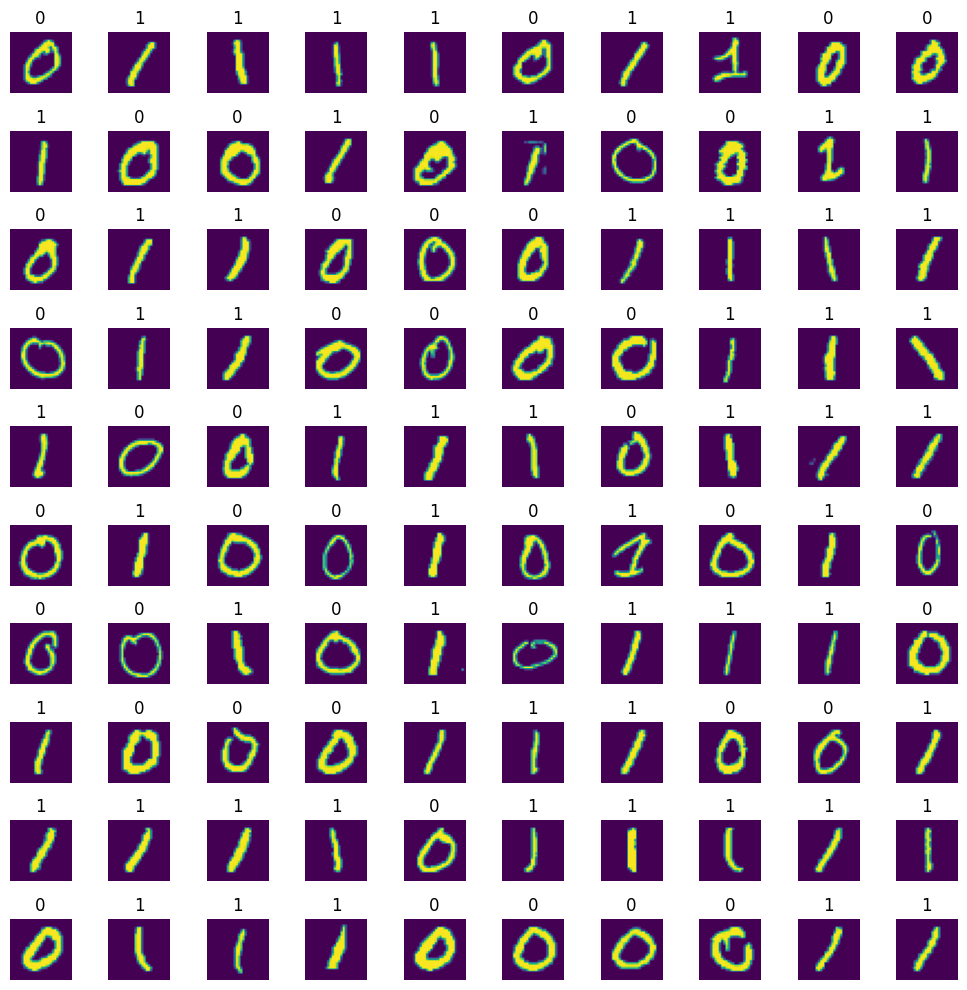

In [21]:
# 9-main
def forward_prop(X, W, b):
    Z = np.matmul(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def calculate_grads(Y, A, W, b):
    m = Y.shape[0]
    dZ = A - Y
    dW = np.matmul(X.T, dZ) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    return dW, db

def calculate_cost(Y, A):
    m = Y.shape[0]
    loss = - (Y * np.log(A) + (1 - Y) * np.log(1 - A))
    cost = np.sum(loss) / m

    return cost

lib_train = np.load('../data/Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y'].T
X = X_3D.reshape((X_3D.shape[0], -1))

nx = X.shape[1]
np.random.seed(0)
W = np.random.randn(nx, 1)
b = 0
dW_prev1 = np.zeros((nx, 1))
db_prev1 = 0
dW_prev2 = np.zeros((nx, 1))
db_prev2 = 0
for i in range(1000):
    A = forward_prop(X, W, b)
    if not (i % 100):
        cost = calculate_cost(Y, A)
        print('Cost after {} iterations: {}'.format(i, cost))
    dW, db = calculate_grads(Y, A, W, b)
    W, dW_prev1, dW_prev2 = update_variables_Adam(0.001, 0.9, 0.99, 1e-8, W, dW, dW_prev1, dW_prev2, i + 1)
    b, db_prev1, db_prev2 = update_variables_Adam(0.001, 0.9, 0.99, 1e-8, b, db, db_prev1, db_prev2, i + 1)
A = forward_prop(X, W, b)
cost = calculate_cost(Y, A)
print('Cost after {} iterations: {}'.format(1000, cost))

Y_pred = np.where(A >= 0.5, 1, 0)
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_3D[i])
    plt.title(str(Y_pred[i, 0]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
# Task 10. Adam Upgraded
def create_Adam_op(loss, alpha, beta1, beta2, epsilon):
    """
    Creates training operation for a neural network in tensorflow using the
    Adam optimization algorithm
    loss: loss of the network
    alpha: learning rate
    beta1: weight used for the first moment
    beta2: weight used for the second moment
    epsilon: small number to avoid divide by zero error
    Returns the Adam optimization operation
    """
    return tf.train.AdamOptimizer(alpha, beta1, beta2, epsilon).minimize(loss)

INFO:tensorflow:Restoring parameters from ./graph.ckpt


2023-03-01 09:58:09.547120: W tensorflow/c/c_api.cc:291] Operation '{name:'layer_2/bias/RMSProp_1/Assign' id:1032 op device:{requested: '', assigned: ''} def:{{{node layer_2/bias/RMSProp_1/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@layer_2/bias"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](layer_2/bias/RMSProp_1, layer_2/bias/RMSProp_1/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Cost after 0 iterations: 2.8232288360595703
Cost after 100 iterations: 0.13941046595573425
Cost after 200 iterations: 0.06568992882966995
Cost after 300 iterations: 0.015488950535655022
Cost after 400 iterations: 0.06543224304914474
Cost after 500 iterations: 0.0012831453932449222
Cost after 600 iterations: 0.0002768777194432914
Cost after 700 iterations: 0.0003967249358538538
Cost after 800 iterations: 0.00012894769315607846
Cost after 900 iterations: 3.833240771200508e-05
Cost after 1000 iterations: 7.211039246612927e-06


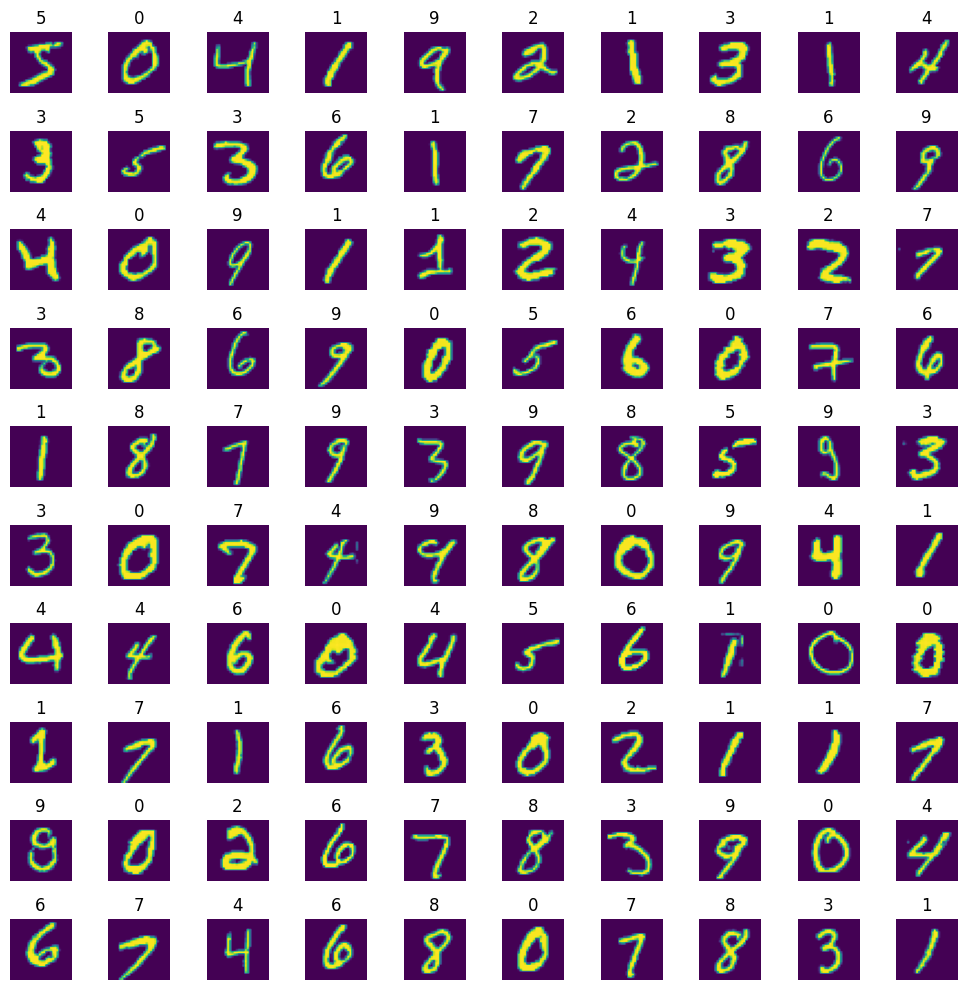

In [23]:
# 10-main
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot

lib= np.load('../data/MNIST.npz')
X_3D = lib['X_train']
Y = lib['Y_train']
X = X_3D.reshape((X_3D.shape[0], -1))
Y_oh = one_hot(Y, 10)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./graph.ckpt.meta')
    saver.restore(sess, './graph.ckpt')
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    y_pred = tf.get_collection('y_pred')[0]
    loss = tf.get_collection('loss')[0]
    train_op = create_Adam_op(loss, 0.001, 0.9, 0.99, 1e-8)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(1000):
        if not (i % 100):
            cost = sess.run(loss, feed_dict={x:X, y:Y_oh})
            print('Cost after {} iterations: {}'.format(i, cost))
        sess.run(train_op, feed_dict={x:X, y:Y_oh})
    cost, Y_pred_oh = sess.run((loss, y_pred), feed_dict={x:X, y:Y_oh})
    print('Cost after {} iterations: {}'.format(1000, cost))

Y_pred = np.argmax(Y_pred_oh, axis=1)

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_3D[i])
    plt.title(str(Y_pred[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
# Task 11. Learning Rate Decay
def np_learning_rate_decay(alpha, decay_rate, global_step, decay_step):
    """
    Function that updates the learning rate using inverse time decay in numpy
    alpha: original learning rate
    decay_rate: weight used to determine the rate at which alpha will decay
    global_step: the number of passes of gradient descent that have elapsed
    decay_step: the number of passes of gradient descent that should occur
    before alpha is decayed further
    The learning rate should occur in a stepwise fashion
    Returns the updated value for alpha
    """
    return alpha / (1 + decay_rate * (global_step // decay_step))

In [25]:
# 11-main
alpha_init = 0.1
for i in range(100):
    alpha = np_learning_rate_decay(alpha_init, 1, i, 10)
    print(alpha)

0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.016666666666666666
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.014285714285714287
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.011111111111111112
0.011111111111111112
0.011111111111111112
0.011111111111111112
0.011111111111111112
0.011

In [26]:
# Task 12. Learning Rate Decay Upgraded
def tf_learning_rate_decay(alpha, decay_rate, global_step, decay_step):
    """
    Function that creates a learning rate decay operation in tensorflow using
    inverse time decay
    alpha: original learning rate
    decay_rate: weight used to determine the rate at which alpha will decay
    global_step: the number of passes of gradient descent that have elapsed
    decay_step: the number of passes of gradient descent that should occur
    before alpha is decayed further
    The learning rate should occur in a stepwise fashion
    Returns the learning rate decay option
    """
    return tf.train.inverse_time_decay(learning_rate=alpha,
                                       global_step=global_step,
                                       decay_steps=decay_step,
                                       decay_rate=decay_rate,
                                       staircase=True)

In [27]:
# 12-main
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot

lib= np.load('../data/MNIST.npz')
X_3D = lib['X_train']
Y = lib['Y_train']
X = X_3D.reshape((X_3D.shape[0], -1))
Y_oh = one_hot(Y, 10)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./graph.ckpt.meta')
    saver.restore(sess, './graph.ckpt')
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    loss = tf.get_collection('loss')[0]
    global_step = tf.Variable(0, trainable=False)
    alpha = 0.1
    alpha = tf_learning_rate_decay(alpha, 1, global_step, 10)
    train_op = tf.train.GradientDescentOptimizer(alpha).minimize(loss, global_step=global_step)
    init = tf.global_variables_initializer()
    sess.run(init)       
    for i in range(100):
        a = sess.run(alpha)
        print(a)
        sess.run(train_op, feed_dict={x:X, y:Y_oh})

INFO:tensorflow:Restoring parameters from ./graph.ckpt
0.1


2023-03-01 10:03:07.095446: W tensorflow/c/c_api.cc:291] Operation '{name:'layer_2/bias/Adam_1/Assign' id:1457 op device:{requested: '', assigned: ''} def:{{{node layer_2/bias/Adam_1/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@layer_2/bias"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](layer_2/bias/Adam_1, layer_2/bias/Adam_1/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.033333335
0.033333335
0.033333335
0.033333335
0.033333335
0.033333335
0.033333335
0.033333335
0.033333335
0.033333335
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.016666668
0.016666668
0.016666668
0.016666668
0.016666668
0.016666668
0.016666668
0.016666668
0.016666668
0.016666668
0.014285714
0.014285714
0.014285714
0.014285714
0.014285714
0.014285714
0.014285714
0.014285714
0.014285714
0.014285714
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.011111111
0.011111111
0.011111111
0.011111111
0.011111111
0.011111111
0.011111111
0.011111111
0.011111111
0.011111111
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


In [28]:
# Task 13. Batch Normalization
def batch_norm(Z, gamma, beta, epsilon):
    """
    Function that normalizes an unactivated output of a neural network using
    batch normalization
    Z: numpy.ndarray of shape (m, n) that is to be normalized
        m: number of data points
        n: number of features in Z
    gamma: numpy.ndarray of shape (1, n) containing the scales used for batch
        normalization
    beta: numpy.ndarray of shape (1, n) containing the offsets used for batch
        normalization
    epsilon: small number used to avoid divide by zero errors
    Returns a normalized Z matrix
    """
    mu = np.mean(Z, axis=0)
    sigma = np.std(Z, axis=0)
    Z_norm = (Z - mu) / ((sigma ** 2 + epsilon) ** (1/2))
    return (gamma * Z_norm) + beta

In [29]:
# 13-main
np.random.seed(0)
a = np.random.normal(0, 2, size=(100, 1))
b = np.random.normal(2, 1, size=(100, 1))
c = np.random.normal(-3, 10, size=(100, 1))
Z = np.concatenate((a, b, c), axis=1)
gamma = np.random.rand(1, 3)
beta = np.random.rand(1, 3)
print(Z[:10])
Z_norm = batch_norm(Z, gamma, beta, 1e-8)
print(Z_norm[:10])

[[  3.52810469   3.8831507   -6.69181838]
 [  0.80031442   0.65224094  -5.39379178]
 [  1.95747597   0.729515     7.99659596]
 [  4.4817864    2.96939671   3.55263731]
 [  3.73511598   0.82687659   3.40131526]
 [ -1.95455576   3.94362119 -19.16956044]
 [  1.90017684   1.58638102  -3.24326124]
 [ -0.30271442   1.25254519 -10.38030909]
 [ -0.2064377    3.92294203  -0.20075401]
 [  0.821197     3.48051479  -3.9815039 ]]
[[ 1.48744676  0.95227435  0.82862045]
 [ 0.63640337 -0.29189903  0.83717117]
 [ 0.99742624 -0.26214198  0.92538004]
 [ 1.78498595  0.60040182  0.89610557]
 [ 1.55203222 -0.22464954  0.89510874]
 [-0.22308868  0.9755606   0.74642361]
 [ 0.97954948  0.06782387  0.85133774]
 [ 0.29226936 -0.06073115  0.8043226 ]
 [ 0.32230674  0.96759737  0.87138019]
 [ 0.64291853  0.79722549  0.84647459]]


In [30]:
# Task 14. Batch Normalization Upgraded
def create_batch_norm_layer(prev, n, activation):
    """
    Creates a batch normalization layer for a nerual network in tensorflow
    prev: activated output of the previous layer
    n: number of nodes in the layer to be created
    activation: activation function that is to be used on the output of the
    layer
    Use tf.layers.Dense as the base layer with kernal initializer
        tf.contrib.layers.variance_Scaling_initializer(mode="FAN_AVG")
    Layer should incorporate two trainable parameters, gamma and beta
        gamma(scale in tf doc): initialized as vector of 1s
        beta(offset in tf doc): initialized as vector of 0s
    epsilon: 1e-8 to avoid divide by zero errors
    Returns a tensor of the normalized activated output for the layer
    """
    weights = tf.keras.initializers.VarianceScaling(mode="fan_avg")
    layers = tf.layers.dense(inputs=prev,
                             units=n,
                             kernel_initializer=weights)
    mean, variance = tf.nn.moments(layers, 0)
    gamma = tf.Variable(tf.ones(n), trainable=True)
    beta = tf.Variable(tf.zeros(n), trainable=True)
    epsilon = 1/100000000
    return activation(tf.nn.batch_normalization(layers,
                                                mean,
                                                variance,
                                                beta,
                                                gamma,
                                                epsilon))

In [31]:
# 14-main
lib= np.load('../data/MNIST.npz')
X_3D = lib['X_train']
X = X_3D.reshape((X_3D.shape[0], -1))

tf.set_random_seed(0)
x = tf.placeholder(tf.float32, shape=[None, 784])
a = create_batch_norm_layer(x, 256, tf.nn.tanh)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(a, feed_dict={x:X[:5]}))

[[ 0.6672535   0.90759164  0.41246536 ...  0.05947699  0.40619645
  -0.4526412 ]
 [ 0.77464145  0.20168124  0.5170716  ...  0.36807832 -0.00749324
   0.10549095]
 [ 0.5094381   0.12572573  0.5851918  ...  0.90912664  0.5256572
   0.6994945 ]
 [-0.75573    -0.92336535 -0.96292454 ... -0.41350573 -0.95724416
  -0.9268341 ]
 [-0.8882128  -0.22904135  0.294406   ... -0.91014683  0.7183436
   0.8181756 ]]


/tmp/ipykernel_2376/3597739053.py:18: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  layers = tf.layers.dense(inputs=prev,


In [15]:
# Task 15. Put it all together and what do you get?
"""
Builds, trains, and saves a neural network model in tensorflow
"""
def create_batch_norm_layer(prev, n, activation, last, epsilon):
    """
    Creates a batch normalization for a neural network
    prev: activated output of the previous layer
    n, number of nodes in the layer to be created
    activation: activation function that is to be used on the output of the
        layer
    last: boolean operator. If last layer, return that tensor for that layer
    epsilon: small number to avoid divide by zero errors

    This is similar to task 14, except we needed to add check for last layer
    """

    init = tf.keras.initializers.VarianceScaling(mode="fan_avg")
    layers = tf.layers.dense(inputs=prev,
                             units=n,
                             kernel_initializer=init)
    if last is True:
        return layers
    mean, variance = tf.nn.moments(layers, axes=[0])
    gamma = tf.Variable(tf.ones(n), trainable=True)
    beta = tf.Variable(tf.zeros(n), trainable=True)
    return activation(tf.nn.batch_normalization(layers,
                                                mean,
                                                variance,
                                                beta,
                                                gamma,
                                                epsilon))


def forward_prop(input, epsilon, layer_sizes=[], activations=[]):
    """
    Use tensorflow to calculate forward propagation of the neural network
    input: placeholder for input data
    epsilon: small number to avoid divide by zero errors
    layer_sizes: list containing the number of nodes for each layer of the nn
    activations: list containing the activation functions for each layer
    Returns: prediction of the network in tensor form
    """
    prediction = input
    last = False
    for node in range(len(layer_sizes)):
        if node == len(layer_sizes) - 1:
            last = True
        prediction = create_batch_norm_layer(prediction,
                                             layer_sizes[node],
                                             activations[node],
                                             last,
                                             epsilon)
    return prediction


def calculate_accuracy(labels, pred_labels):
    """Calculates accuracy of prediction"""
    labels_max = tf.math.argmax(labels, axis=1)
    labels_pred_max = tf.math.argmax(pred_labels, axis=1)
    equality = tf.math.equal(labels_max, labels_pred_max)
    accuracy = tf.math.reduce_mean(tf.cast(equality, tf.float32))
    return accuracy


def shuffle_data(X, Y):
    """
    Shuffles the data points in two matrices the same way
    X: First numpy.ndarray matrix of shape (m, nx) to be shuffled
    Y: Second numpy.ndarray matrix of shape (m, ny) to be shuffled
    m: number of data points
    nx/ny: number of features in X and Y respectively
    """
    assert len(X) == len(Y)
    p = np.random.permutation(len(X))
    return X[p], Y[p]


def model(Data_train, Data_valid, layers, activations,
          alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8,
          decay_rate=1, batch_size=32, epochs=5, save_path='/tmp/model.ckpt'):
    """
    Builds, trains, and saves a neural network model in tensorflow
        See README for details on variables
    Data_train: tuple containing the training inputs and training labels
    Data_valid: tuple containing the validation inputs and labels
    layers: list containing the number of nodes in each layer
    activation: list containing the activation functions for each layer
    alpha: learning rate
    beta1: weight for first moment of Adam Optimization
    beta2: weight for second moment of Adam Optimization
    epsilon: small number to avoid divide by zero errors
    decay_rate: decay rate for inverse time decay of the learning rate
    batch_size: number of data points that should be in each mini-batch
    epochs: number of times the training should pass through the whole dataset
    save_path: path where the model should be saved to
    Returns the path where the model was saved
    """
    X_train, Y_train = Data_train
    X_valid, Y_valid = Data_valid
    data = tf.placeholder(name='data', dtype=tf.float32,
                       shape=[None, X_train.shape[1]])
    labels = tf.placeholder(name='labels', dtype=tf.float32,
                       shape=[None, Y_train.shape[1]])
    tf.add_to_collection('data', data)
    tf.add_to_collection('labels', labels)
    pred_labels = forward_prop(data, epsilon, layers, activations)
    tf.add_to_collection('y_pred', pred_labels)
    accuracy = calculate_accuracy(labels, pred_labels)
    tf.add_to_collection('accuracy', accuracy)
    loss = tf.losses.softmax_cross_entropy(labels, pred_labels)
    tf.add_to_collection('loss', loss)
    global_step = tf.Variable(0, trainable=False)
    mini_batch_size = len(X_train) // batch_size
    while mini_batch_size % batch_size != 0:
        mini_batch_size += 1
    alpha = tf.train.inverse_time_decay(learning_rate=alpha,
                                        global_step=global_step,
                                        decay_steps=mini_batch_size,
                                        decay_rate=decay_rate,
                                        staircase=True)
    train_op = tf.train.AdamOptimizer(alpha,
                                      beta1,
                                      beta2,
                                      epsilon).minimize(loss,
                                                        global_step)
    tf.add_to_collection("train_op", train_op)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epochs + 1):
            train_loss = loss.eval({data: X_train,
                                    labels: Y_train})
            train_accuracy = accuracy.eval({data: X_train,
                                            labels: Y_train})
            validation_loss = loss.eval({data: X_valid,
                                         labels: Y_valid})
            validation_accuracy = accuracy.eval({data: X_valid,
                                                 labels: Y_valid})
            print("After {} epochs:".format(epoch))
            print("\tTraining Cost: {}".format(train_loss))
            print("\tTraining Accuracy: {}".format(train_accuracy))
            print("\tValidation Cost: {}".format(validation_loss))
            print("\tValidation Accuracy: {}".format(validation_accuracy))
            if epoch == epochs:
                break
            data_shuffled, labels_shuffled = shuffle_data(X_train, Y_train)
            for batch in range(0, data_shuffled.shape[0], batch_size):
                mini_batch_dict = {
                    data: data_shuffled[batch:batch + batch_size],
                    labels: labels_shuffled[batch:batch + batch_size]
                    }
                sess.run((train_op), feed_dict=mini_batch_dict)
                iterator = batch // batch_size + 1
                if not ((batch // batch_size + 1) % 100):
                    mini_batch_cost = loss.eval(mini_batch_dict)
                    mini_batch_accuracy = accuracy.eval(mini_batch_dict)
                    print("\tStep {}:".format(iterator))
                    print("\t\tCost: {}".format(mini_batch_cost))
                    print("\t\tAccuracy: {}".format(mini_batch_accuracy))
        saver = tf.train.Saver()
        return saver.save(sess, save_path)

In [16]:
# 15-main
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    oh = np.zeros((Y.shape[0], classes))
    oh[np.arange(Y.shape[0]), Y] = 1
    return oh

lib= np.load('../data/MNIST.npz')
X_train_3D = lib['X_train']
Y_train = lib['Y_train']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1))
Y_train_oh = one_hot(Y_train, 10)
X_valid_3D = lib['X_valid']
Y_valid = lib['Y_valid']
X_valid = X_valid_3D.reshape((X_valid_3D.shape[0], -1))
Y_valid_oh = one_hot(Y_valid, 10)

layer_sizes = [256, 256, 10]
activations = [tf.nn.tanh, tf.nn.tanh, None]

np.random.seed(0)
tf.set_random_seed(0)
save_path = model((X_train, Y_train_oh), (X_valid, Y_valid_oh), layer_sizes,
                                activations, save_path='./model.ckpt')
print('Model saved in path: {}'.format(save_path))

/tmp/ipykernel_3427/2155264688.py:19: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  layers = tf.layers.dense(inputs=prev,


After 0 epochs:
	Training Cost: 2.477104425430298
	Training Accuracy: 0.12906000018119812
	Validation Cost: 2.481989860534668
	Validation Accuracy: 0.125
	Step 100:
		Cost: 0.26826411485671997
		Accuracy: 0.84375
	Step 200:
		Cost: 0.34057360887527466
		Accuracy: 0.875
	Step 300:
		Cost: 0.335995078086853
		Accuracy: 0.875
	Step 400:
		Cost: 0.20783016085624695
		Accuracy: 0.9375
	Step 500:
		Cost: 0.21486932039260864
		Accuracy: 0.90625
	Step 600:
		Cost: 0.23923151195049286
		Accuracy: 0.96875
	Step 700:
		Cost: 0.46597498655319214
		Accuracy: 0.78125
	Step 800:
		Cost: 0.13859646022319794
		Accuracy: 0.96875
	Step 900:
		Cost: 0.24826887249946594
		Accuracy: 0.9375
	Step 1000:
		Cost: 0.18254265189170837
		Accuracy: 0.96875
	Step 1100:
		Cost: 0.12136930972337723
		Accuracy: 0.96875
	Step 1200:
		Cost: 0.1456153243780136
		Accuracy: 0.96875
	Step 1300:
		Cost: 0.5720627307891846
		Accuracy: 0.84375
	Step 1400:
		Cost: 0.07857852429151535
		Accuracy: 0.96875
	Step 1500:
		Cost: 0.057

In [19]:
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    oh = np.zeros((Y.shape[0], classes))
    oh[np.arange(Y.shape[0]), Y] = 1
    return oh

# set variables
np.random.seed(15)
s1, s2 = np.random.randint(15, 50, 2)
b1, b2 = np.random.randint(100, 125, 2)
b = np.random.randint(4, 10)
e1 = s1 + (b1 * (2 ** b))
e2 = s2 + (b2 * (2 ** b))
n1, n2, n3 = np.random.randint(50, 100, 3)
c = 10
layers = [n1, n2, n3, c]
activations = [tf.nn.tanh, tf.nn.tanh, tf.nn.tanh, None]
a, b1, b2 = np.random.uniform(0.01, size=3)

lib= np.load('../data/MNIST.npz')
X_train = lib['X_train'][s1:e1].reshape((e1 - s1, -1))
Y_train = one_hot(lib['Y_train'][s1:e1], c)
X_valid = lib['X_valid'][s2:e2].reshape((e2 - s2, -1))
Y_valid = one_hot(lib['Y_valid'][s2:e2], c)
tf.set_random_seed(0)
model((X_train, Y_train), (X_valid, Y_valid), layers=layers, activations=activations,
      alpha=a, beta1=b1, beta2=b2, batch_size=(2 ** b), epochs=1, save_path='./test.chpt')

/tmp/ipykernel_3427/2155264688.py:19: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  layers = tf.layers.dense(inputs=prev,


After 0 epochs:
	Training Cost: 2.482639789581299
	Training Accuracy: 0.09583333134651184
	Validation Cost: 2.4574694633483887
	Validation Accuracy: 0.10721544921398163
	Step 100:
		Cost: 5.004990577697754
		Accuracy: 0.8125
After 1 epochs:
	Training Cost: 25.991220474243164
	Training Accuracy: 0.3095238208770752
	Validation Cost: 26.65673065185547
	Validation Accuracy: 0.27693089842796326


'./test.chpt'